In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Project:Heart Disease Risk Prediction (Information)

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

Columns Information:

        1)age
        2)sex
        3)chest pain type (4 values)
        4)resting blood pressure
        5)serum cholestoral in mg/dl
        6)fasting blood sugar > 120 mg/dl
        7)resting electrocardiographic results (values 0,1,2)
        8)maximum heart rate achieved
        9)exercise induced angina
       10)oldpeak = ST depression induced by exercise relative to rest
       11)the slope of the peak exercise ST segment
       12)number of major vessels (0-3) colored by flourosopy
       13)thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
       14)Heart Disease it indicate Presence and Absense

Step 1: Load The dataset..

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


Step 2: Checking info of the Dataset

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Step 3: Checking Dataset contain null Value or not..

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


Step 4:Checking The count..

In [ ]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categories=['Heart Disease']
for i in categories:
  df[i]=le.fit_transform(df[i])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


Step 5: Graphical Represention..

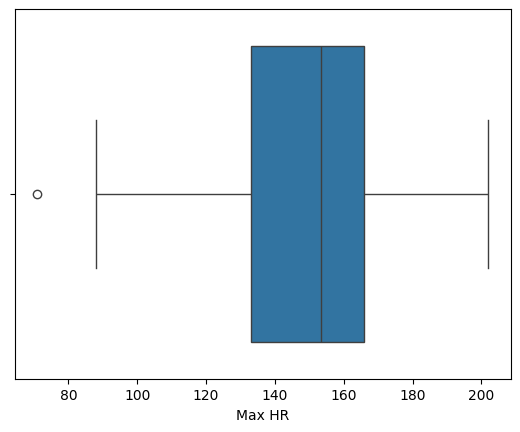

In [ ]:
sns.boxplot(x=df["Max HR"])
plt.show()

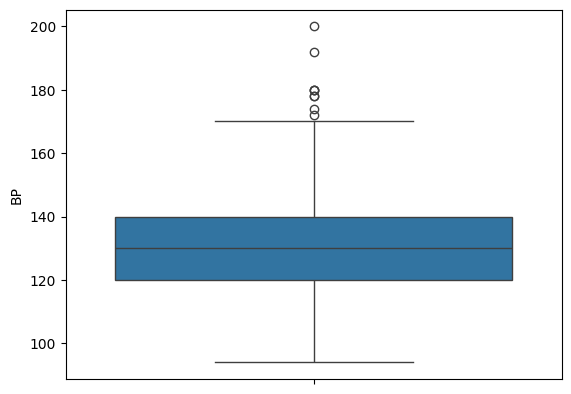

In [ ]:
sns.boxplot(y="BP",data=df)
plt.show()

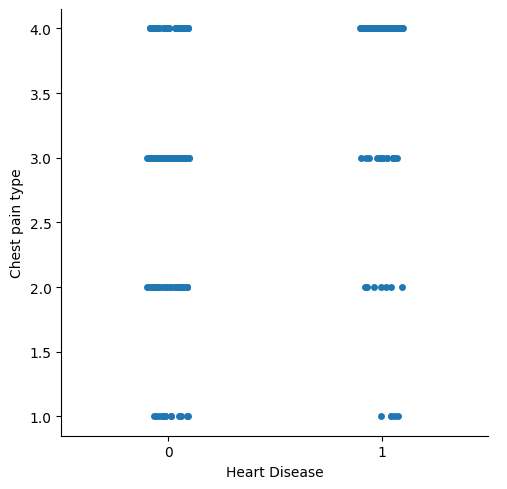

In [ ]:
sns.catplot(x='Heart Disease',y='Chest pain type',data=df)
plt.show()

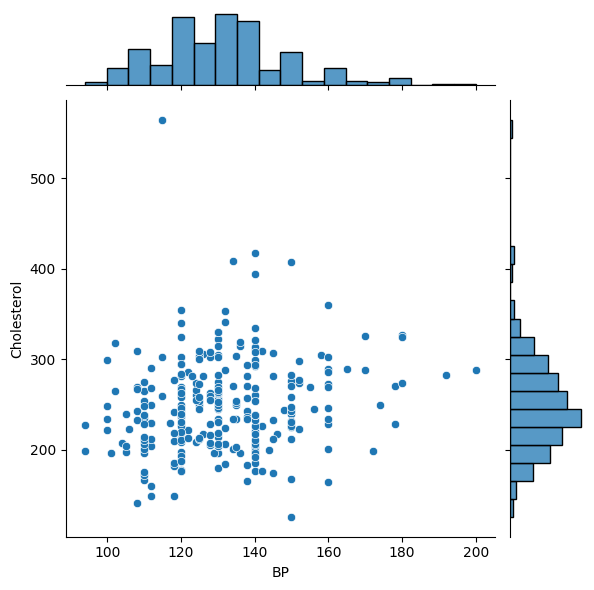

In [ ]:
sns.jointplot(x='BP',y='Cholesterol',data=df)
plt.show()

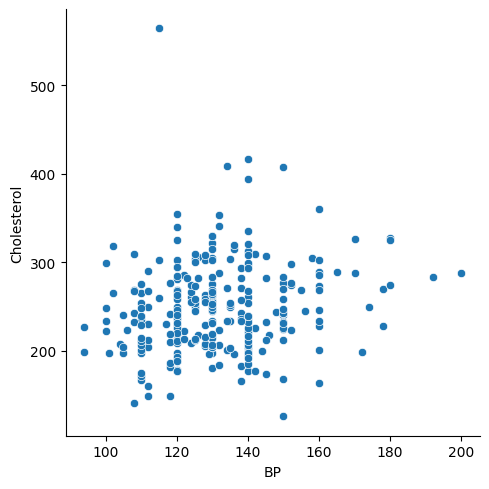

In [ ]:
sns.relplot(x='BP',y='Cholesterol',data=df)
plt.show()

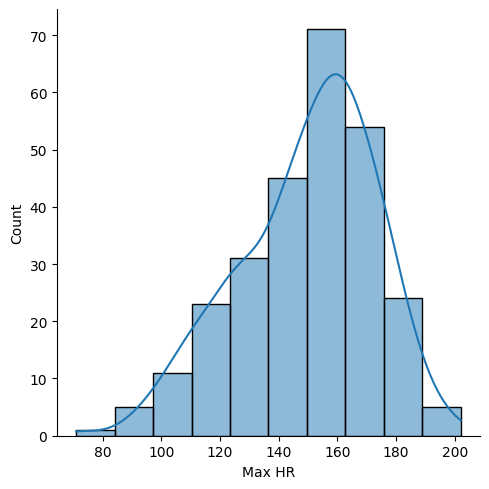

In [ ]:
sns.displot(df['Max HR'],bins=10,kde=True)
plt.show()

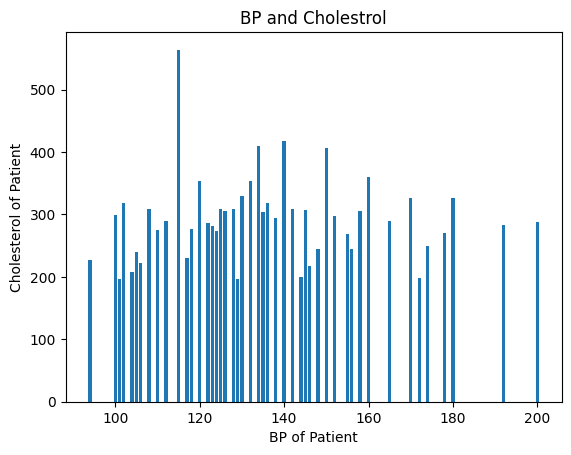

In [ ]:
plt.bar(df['BP'],df['Cholesterol'])
plt.xlabel('BP of Patient')
plt.ylabel('Cholesterol of Patient')
plt.title('BP and Cholestrol')
plt.show()

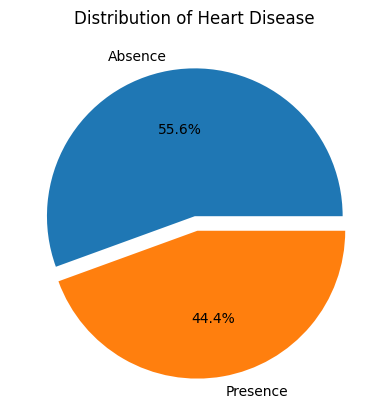

In [ ]:
heart_disease_counts = df['Heart Disease'].value_counts()
labels = ['Absence' if x == 0 else 'Presence' for x in heart_disease_counts.index]
plt.pie(heart_disease_counts, labels=labels, autopct='%1.1f%%', explode=[0,0.1])
plt.title('Distribution of Heart Disease')
plt.show()

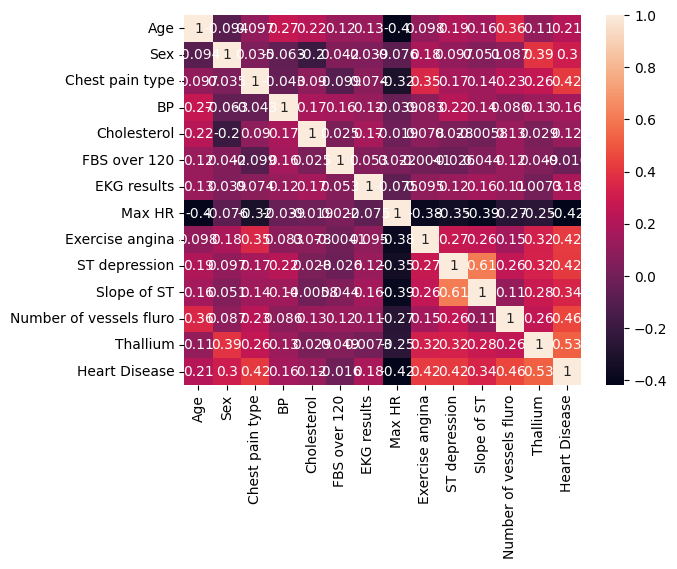

In [ ]:
c_m = df.corr(numeric_only=True)
sns.heatmap(c_m,annot=True)
plt.show()

Step 6: Data Wrongling...

> 1) Assign X & y values.
  2) Data Balancing..
  3) Train and Test..



In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop("Heart Disease",axis=1)
y=df["Heart Disease"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(random_state=0)
x_new,y_new=rs.fit_resample(x,y)

print('after undersampling dataset shape')
print("--------------------------------")

y_new.value_counts()

after undersampling dataset shape
--------------------------------


,count
Heart Disease,
0,120
1,120


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(random_state=0)
dt_default.fit(x_train,y_train)

pred_train=dt_default.predict(x_train)
pred_test=dt_default.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,pred_train))
print("Test Accuracy :",accuracy_score(y_test,pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 0.7037037037037037
Cross Validation Score: 0.725925925925926


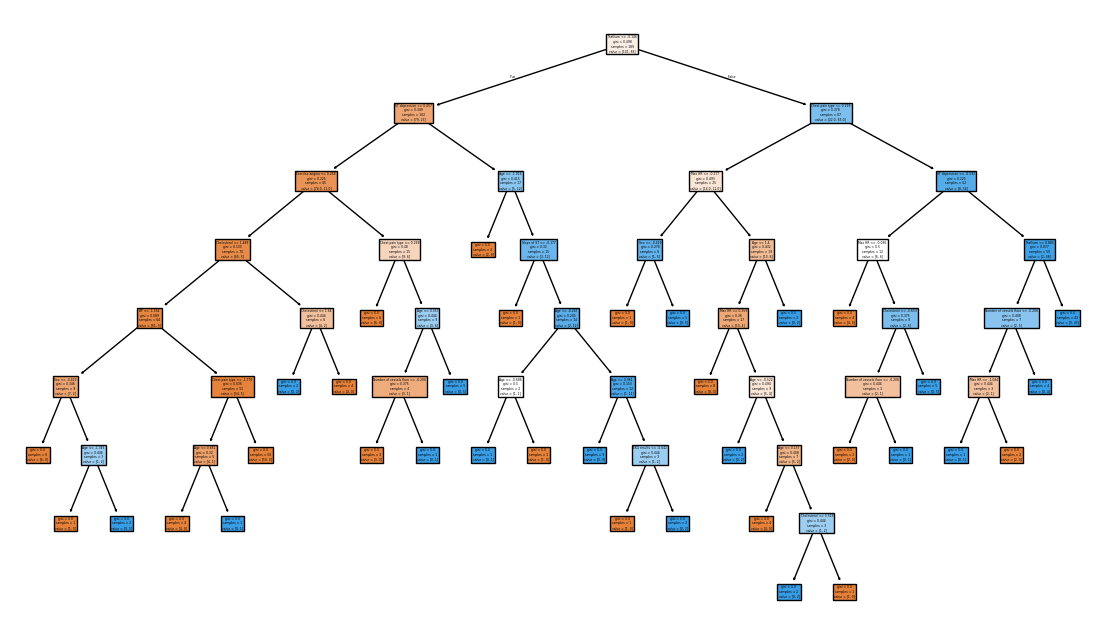

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt_default,filled=True,feature_names=x.columns)
plt.show()

In [ ]:
pd.DataFrame(index=x.columns,data=dt_default.feature_importances_,columns=["Feature Importance"])

,Feature Importance
Age,0.159393
Sex,0.036622
Chest pain type,0.108255
BP,0.006847
Cholesterol,0.069822
FBS over 120,0.000000
EKG results,0.014176
Max HR,0.089836
Exercise angina,0.028359
ST depression,0.143655


Step 7: Data Modeling..

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=0)
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4]
}

cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)
dt_default.fit(x_train,y_train)

pred_train=dt_default.predict(x_train)
pred_test=dt_default.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,pred_train))
print("Test Accuracy :",accuracy_score(y_test,pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 0.798941798941799
Test Accuracy : 0.7160493827160493
Cross Validation Score: 0.7407407407407407


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 0.8395061728395061
Cross Validation Score: 0.8037037037037038


In [ ]:
from sklearn.model_selection import GridSearchCV

estimator=RandomForestClassifier(random_state=0)
param_grid={'n_estimators':list(range(1,101))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 99}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=99,random_state=0)
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 0.8395061728395061
Cross Validation Score: 0.8037037037037038


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

estimator=SVC()
param_grid={'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [ ]:
from sklearn.svm import SVC
model=SVC(C=0.1, kernel='linear')
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

0.8306878306878307
0.8518518518518519
Cross Validation Score: 0.8037037037037038


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

y_pred_train=knn_model.predict(x_train)
y_pred_test=knn_model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x_train,y_train,cv=5)
scores.mean()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

0.8835978835978836
0.7901234567901234
Cross Validation Score: 0.8037037037037038


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x_train,y_train,cv=5)
scores.mean()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())


0.8571428571428571
0.8271604938271605
Cross Validation Score: 0.8037037037037038


In [ ]:
Heart_df=pd.DataFrame({
    "Algorithm":["KNN","SVC","DT","RF","LR"],
    "Train Accuracy":[0.88,0.85,0.79,1,0.85],
    "Test Accuracy":[0.79,0.83,0.71,0.83,0.82],
    "CV Score":[0.80,0.80,0.74,0.80,0.80]
})
Heart_df

,Algorithm,Train Accuracy,Test Accuracy,CV Score
0,KNN,0.88,0.79,0.80
1,SVC,0.85,0.83,0.80
2,DT,0.79,0.71,0.74
3,RF,1.00,0.83,0.80
4,LR,0.85,0.82,0.80
